In [1]:
import numpy as np
import xarray as xr
import glob
import os
import matplotlib.pyplot as plt
import datetime
from time import strftime
import pandas as pd

#DATE REF
date_1 = datetime.datetime.strptime('01/01/1950', "%m/%d/%Y")

ROOT = "/home5/pharos/venthsal/data/PIRATE/COLOC_EN4/2005/"
path = glob.glob(os.path.join(ROOT+'*01.nc'))

#OPEN
OCC=xr.open_mfdataset(path,concat_dim='N_OBS',decode_times=False,mask_and_scale=True)
#GET ONLY MATCHING PROFILES
OCC=OCC.where((OCC.MATCH_EN4==1),drop=True)



In [7]:
for u in OCC.N_OBS.values:
    print u,date_1 + datetime.timedelta(days=float(OCC.JULD_EN4[u].values))

0 2005-01-01 00:36:41
1 2005-01-01 00:36:28
2 2005-01-01 00:38:36
3 2005-01-01 07:45:00
4 2005-01-01 07:46:00
5 2005-01-01 07:47:00
6 2005-01-01 10:01:00
7 2005-01-01 12:49:25
8 2005-01-01 14:57:00
9 2005-01-02 03:37:16
10 2005-01-02 04:11:00
11 2005-01-02 03:37:16
12 2005-01-02 07:33:00
13 2005-01-02 12:32:17
14 2005-01-03 05:40:00
15 2005-01-03 07:24:00
16 2005-01-03 09:02:00
17 2005-01-03 09:15:00
18 2005-01-03 13:45:57
19 2005-01-03 13:45:00
20 2005-01-03 14:31:00
21 2005-01-04 02:38:46
22 2005-01-04 08:49:00
23 2005-01-04 10:28:00
24 2005-01-04 13:22:56
25 2005-01-04 13:22:56
26 2005-01-04 15:14:00
27 2005-01-05 00:38:33
28 2005-01-05 05:13:34
29 2005-01-05 14:40:38
30 2005-01-05 16:43:00
31 2005-01-06 06:46:06
32 2005-01-06 08:28:00
33 2005-01-06 12:08:00
34 2005-01-06 14:54:00
35 2005-01-06 13:48:00
36 2005-01-06 14:54:00
37 2005-01-07 09:18:00
38 2005-01-07 13:54:10
39 2005-01-07 20:45:00
40 2005-01-08 04:44:35
41 2005-01-08 08:55:00
42 2005-01-08 13:35:32
43 2005-01-08 13:36:2

<IPython.core.display.Javascript object>


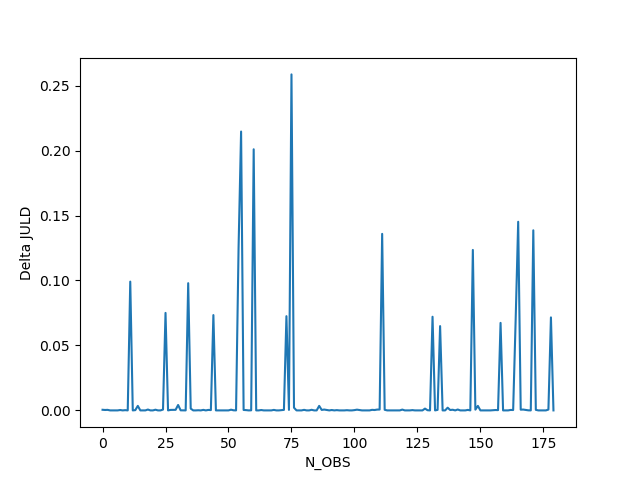

Text(0,0.5,u'Delta JULD')

In [2]:
%matplotlib notebook
plt.plot(OCC.N_OBS.values,abs(OCC.JULD.values-OCC.JULD_EN4.values))
plt.xlabel('N_OBS')
plt.ylabel('Delta JULD')

6900166 
2005-01-10 19:26:00
2005-01-10 19:26:00
37.025 -30.662000000000003
37.025 -30.661


<IPython.core.display.Javascript object>


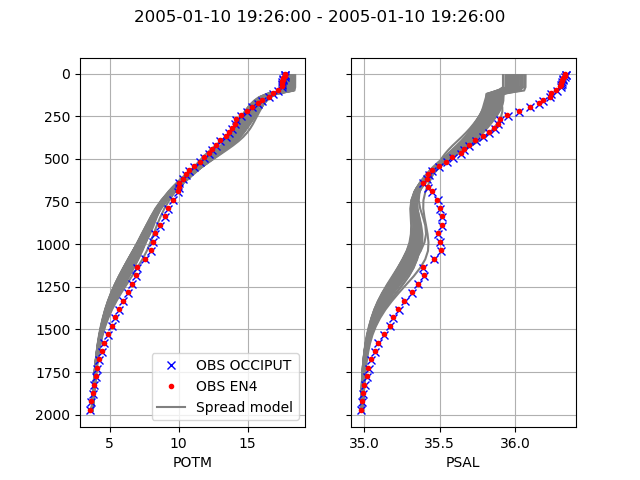

Text(0.5,0,u'PSAL')

In [8]:
indx=58
print OCC.STATION_IDENTIFIER[indx].values
print (date_1 + datetime.timedelta(days=float(OCC.JULD[indx].values)))
print (date_1 + datetime.timedelta(days=float(OCC.JULD_EN4[indx].values)))
print OCC.LATITUDE[indx].values,OCC.LONGITUDE[indx].values
print OCC.LATITUDE_EN4[indx].values,OCC.LONGITUDE_EN4[indx].values

%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.invert_yaxis()
ax1.grid(True)
ax2.grid(True)
f.suptitle(str(date_1 + datetime.timedelta(days=float(OCC.JULD[indx].values)))+' - '+
           str(date_1 + datetime.timedelta(days=float(OCC.JULD_EN4[indx].values))))
for i in range(50):
    l0,=ax1.plot(OCC.POTM_Hx[i,indx,:].values, OCC.DEPTH[indx,:].values, color='gray',label='Spread model')
l1,=ax1.plot(OCC.POTM_OBS[indx,:].values, OCC.DEPTH[indx,:].values, 'bx',label='OBS OCCIPUT')
l2,=ax1.plot(OCC.POTM_EN4[indx,:].values, OCC.DEPTH_EN4[indx,:].values,'r.',label='OBS EN4')
ax1.set_xlabel('POTM')
ax1.legend(handles=[l1, l2, l0])

for i in range(50):
    ax2.plot(OCC.PSAL_Hx[i,indx,:].values, OCC.DEPTH[indx,:].values, color='gray')
ax2.plot(OCC.PSAL_OBS[indx,:].values, OCC.DEPTH[indx,:].values, 'bx')
ax2.plot(OCC.PSAL_EN4[indx,:].values, OCC.DEPTH_EN4[indx,:].values,'r.')
ax2.set_xlabel('PSAL')